# 1) Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


#2) Install the required packages

In [4]:
#!git clone https://github.com/wkzs111/phm-ieee-2012-data-challenge-dataset.git   # Important dataset for carrying out RUL --> Learning set and Test Set4

In [5]:
pwd

'/content/drive/MyDrive'

In [6]:
# !git clone https://github.com/sevamoo/SOMPY
!python /content/drive/MyDrive/SOMPY/setup.py install
!pip install /content/drive/MyDrive/SOMPY

running install
running bdist_egg
running egg_info
writing SOMPY.egg-info/PKG-INFO
writing dependency_links to SOMPY.egg-info/dependency_links.txt
writing requirements to SOMPY.egg-info/requires.txt
writing top-level names to SOMPY.egg-info/top_level.txt
reading manifest file 'SOMPY.egg-info/SOURCES.txt'
writing manifest file 'SOMPY.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying SOMPY.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying SOMPY.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying SOMPY.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying SOMPY.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying SOMPY.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
zip_safe flag not set; analyzing archive contents...
creating 'dist/SOMPY-1.1.1-py3.7.egg' a

NumExpr defaulting to 4 threads.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 

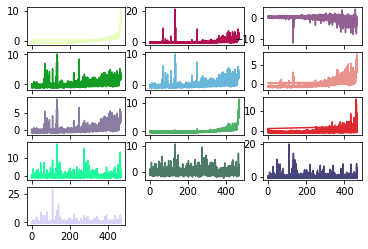

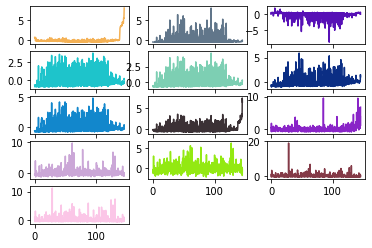

RUL for bearing1_3 predicted by 1st model: 2086.374718696843
RUL for bearing1_3 predicted by 2nd model: 2536.566891466219
RUL for bearing1_4 predicted by 1st model: 1630.82043951897
RUL for bearing1_4 predicted by 2nd model: 1300.2817178019513
RUL for bearing1_5 predicted by 1st model: 4952.012109060233
RUL for bearing1_5 predicted by 2nd model: 2571.0956434908485
RUL for bearing1_6 predicted by 1st model: 2852.394716462576
RUL for bearing1_6 predicted by 2nd model: 3575.494898116075
RUL for bearing1_7 predicted by 1st model: 4102.628395371307
RUL for bearing1_7 predicted by 2nd model: 1957.3170227110438


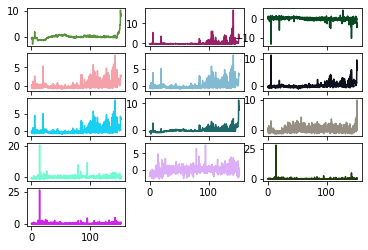

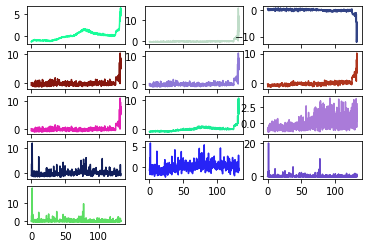

RUL for bearing2_3 predicted by 1st model: 6892.748543260709
RUL for bearing2_3 predicted by 2nd model: 2173.643872059185
RUL for bearing2_4 predicted by 1st model: 909.889755608069
RUL for bearing2_4 predicted by 2nd model: 1085.7657694043994
RUL for bearing2_5 predicted by 1st model: 10136.951258021774
RUL for bearing2_5 predicted by 2nd model: 2968.0315028950554
RUL for bearing2_6 predicted by 1st model: 1048.0168480977172
RUL for bearing2_6 predicted by 2nd model: 3305.9938929838463
RUL for bearing2_7 predicted by 1st model: 1112.9566098521996
RUL for bearing2_7 predicted by 2nd model: 1575.9553553908308


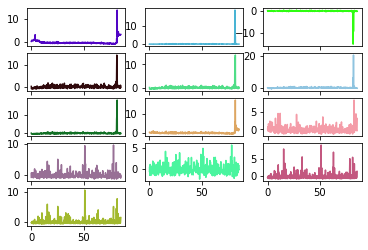

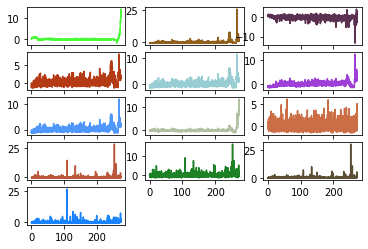

RUL for bearing3_3 predicted by 1st model: 839.1746094431966
RUL for bearing3_3 predicted by 2nd model: 2272.3324351091796
Score of model built using training set 1 (Bearing 1): 0.027595847283766548
Score of model built using training set 2 (Bearing 1): 0.0362956908891348
Score of model built using training set 1 (Bearing 2): 0.39246505063618786
Score of model built using training set 2 (Bearing 2): 0.3563674077687775
Score of model built using training set 1 (Bearing 3): 0.7231298316995054
Score of model built using training set 2 (Bearing 3): 2.1711610190800192e-11


In [7]:
import numpy as np
import pandas as pd
import os
from scipy import stats, fft
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import sompy
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def getDataset(folderpath):
  # print("in getdataset")
  features = []
  folder = os.fsencode(folderpath)
  for file in sorted(os.listdir(folder)):
      filename = os.fsdecode(file)
      if filename[:3] == 'acc':
        data = pd.read_csv(folderpath + '/' + filename, header = None)
        minutes = data.iloc[0, 0] * 60 + data.iloc[0, 1] + data.iloc[0, 2] /60
        rms = np.sqrt(np.mean(data.iloc[:, 4]**2))
        kurtosis = stats.kurtosis(data.iloc[:, 4])
        # print(kurtosis)
        skew = stats.skew(data.iloc[:, 4])
        # print(skew)
        max = np.absolute(data.iloc[:, 4]).max()
        # print(max)
        mean = np.mean(np.absolute(data.iloc[:, 4]))
        crestfactor = max/rms
        impulsefactor = max/mean
        shapefactor = rms/mean
        marginfactor = max/(np.mean(np.sqrt(np.absolute(data.iloc[:, 4])))**2)
        peaktopeak = data.iloc[:, 4].max() - data.iloc[:, 4].min()
        # print(mean, crestfactor, impulsefactor, shapefactor, marginfactor)
        fouriertransform = fft.fft(data.iloc[:, 4].to_numpy())
        fouriertransform = fouriertransform[:int(fouriertransform.size/2)]
        # fourierfrequencies = fft.fftfreq(2560, d=10)
        fourierfrequencies = np.array([i+1 for i in range(fouriertransform.size)])
        meanfrequency = abs(np.mean(fouriertransform))
        frequencycentre = abs(np.dot(fourierfrequencies.transpose(), fouriertransform)/np.sum(fouriertransform))
        rmsfrequency = abs(np.sqrt(np.dot((fourierfrequencies**2).transpose(), fouriertransform)/np.sum(fouriertransform)))
        # print(meanfrequency, frequencycentre, rmsfrequency)
        rawp = np.divide(fouriertransform, np.sum(fouriertransform))
        entropyraw = np.absolute(- np.dot(rawp.transpose(), np.log(rawp+0.00001)))
        # print(entropyraw)
        # plt.plot([i for i in range(1,2561)], data.iloc[:, 4], 'g')
        # plt.plot([i for i in range(1,2561)], np.abs(hilbert(data.iloc[:, 4])), 'r')
        # plt.show()
        fouriertransformenvelope = fft.fft(hilbert(data.iloc[:, 4]))
        fouriertransformenvelope = fouriertransformenvelope[:int(fouriertransformenvelope.size/2)]
        envelopep = np.divide(fouriertransformenvelope, np.sum(fouriertransformenvelope))
        # print(np.absolute(envelopep))
        entropyenvelope = np.absolute(- np.dot(envelopep.transpose(), np.log(envelopep+0.00001)))
        # print(entropyenvelope)
        features.append([minutes, rms, kurtosis, skew, crestfactor, impulsefactor, shapefactor, marginfactor, peaktopeak, meanfrequency, frequencycentre, rmsfrequency, entropyraw, entropyenvelope])
  # print(features)
  features = np.array(features, dtype=np.float64)
  minutes = np.reshape(features[:, 0] - features[0, 0], (features.shape[0], 1))
  features = features[:, 1:]
  scaler = StandardScaler()
  scaler.fit(features)
  features = scaler.transform(features)
  features = np.concatenate((minutes, features), axis=1)
  # print('Out getdataset')
  return features   


def runModel(bearing, testsetlast):
  featuresb1_1 = getDataset('/content/drive/MyDrive/phm-ieee-2012-data-challenge-dataset/Learning_set/Bearing{num}_1'.format(num=bearing))
  healthyfeatures_1 = int(featuresb1_1.shape[0]/5)
  for i in range(1, 14):
    y = featuresb1_1[:, i]
    x = featuresb1_1[:, 0]
    plt.subplot(5, 3, i)
    plt.plot(x, y, c=np.random.rand(3,))
  plt.show()
  featuresb1_2 = getDataset('/content/drive/MyDrive/phm-ieee-2012-data-challenge-dataset/Learning_set/Bearing{num}_2'.format(num=bearing))
  healthyfeatures_2 = int(featuresb1_2.shape[0]/5)
  for i in range(1, 14):
    y = featuresb1_2[:, i]
    x = featuresb1_2[:, 0]
    plt.subplot(5, 3, i)
    plt.plot(x, y, c=np.random.rand(3,))
  plt.show()

  som1 = sompy.SOMFactory.build(featuresb1_1[:healthyfeatures_1], mapsize=[11,10], lattice='rect', initialization='pca', neighborhood='gaussian')
  som1.train(n_job=1, verbose=None)
  som2 = sompy.SOMFactory.build(featuresb1_2[:healthyfeatures_2], mapsize=[11,10], lattice='rect', initialization='pca', neighborhood='gaussian')
  som2.train(n_job=1, verbose=None)


  bmutestfeaturesb1_1 = som1.find_bmu(featuresb1_1[healthyfeatures_1:]).transpose()
  #print(bmutestfeatures)
  mqetestb1_1 = np.zeros((len(bmutestfeaturesb1_1), 1))
  for i in range(len(bmutestfeaturesb1_1)):
    neuron_values = som1.codebook.matrix[bmutestfeaturesb1_1[i, 0].astype(int)]
    #print(neuron_values.shape)
    mqetestb1_1[i] = np.mean(np.abs(neuron_values - featuresb1_1[healthyfeatures_1+i]))
  #print(mqetest)

  bmutrainfeaturesb1_1 = som1.find_bmu(featuresb1_1[:healthyfeatures_1]).transpose()
  mqetrainb1_1 = np.zeros((healthyfeatures_1, 1))
  for i in range(healthyfeatures_1):
    neuron_values = som1.codebook.matrix[bmutrainfeaturesb1_1[i, 0].astype(int)]
    mqetrainb1_1[i] = np.mean(np.abs(neuron_values - featuresb1_1[i]))


  bmutestfeaturesb1_2 = som2.find_bmu(featuresb1_2[healthyfeatures_2:]).transpose()
  mqetestb1_2 = np.zeros((len(bmutestfeaturesb1_2), 1))
  for i in range(len(bmutestfeaturesb1_2)):
    neuron_values = som2.codebook.matrix[bmutestfeaturesb1_2[i, 0].astype(int)]
    mqetestb1_2[i] = np.mean(np.abs(neuron_values - featuresb1_2[healthyfeatures_2+i]))

  bmutrainfeaturesb1_2 = som2.find_bmu(featuresb1_2[:healthyfeatures_2]).transpose()
  mqetrainb1_2 = np.zeros((healthyfeatures_2, 1))
  for i in range(healthyfeatures_2):
    neuron_values = som2.codebook.matrix[bmutrainfeaturesb1_2[i, 0].astype(int)]
    mqetrainb1_2[i] = np.mean(np.abs(neuron_values - featuresb1_2[i]))


  cb1_1 = np.mean(np.sum(mqetrainb1_1)/(np.log(0.99) * healthyfeatures_1))
  cb1_2 = np.mean(np.sum(mqetrainb1_2)/(np.log(0.99) * healthyfeatures_2))

  bhib1_1 = np.zeros((len(bmutestfeaturesb1_1), 1))
  for i in range(1, len(mqetestb1_1)+1):
    bhib1_1[i-1] = np.exp(np.sum(mqetestb1_1[:i-1])/(cb1_1 * i)) 

  bhib1_2 = np.zeros((len(bmutestfeaturesb1_2), 1))
  for i in range(1, len(mqetestb1_2)+1):
    bhib1_2[i-1] = np.exp(np.sum(mqetestb1_2[:i-1])/(cb1_2 * i)) 


  lifepercentageb1_1 = featuresb1_1[healthyfeatures_1:, 0]/featuresb1_1[-1, 0]
  lifepercentageb1_2 = featuresb1_2[healthyfeatures_2:, 0]/featuresb1_2[-1, 0]


  regressor1 = SVR(kernel='rbf')
  regressor1.fit(bhib1_1, lifepercentageb1_1)
  # print(regressor1.score(bhib1_1, lifepercentageb1_1))

  regressor2 = SVR(kernel='rbf')
  regressor2.fit(bhib1_2, lifepercentageb1_2)
  # print(regressor2.score(bhib1_2, lifepercentageb1_2))


  rulmodel1 = np.zeros((testsetlast-2,))
  rulmodel2 = np.zeros((testsetlast-2,))
  for j in range(3, testsetlast+1):
    featuresb1_3 = getDataset('/content/drive/MyDrive/phm-ieee-2012-data-challenge-dataset/Test_set/Bearing{bearingno}_{num}'.format(bearingno=bearing,num=j))
    healthyfeatures = int(featuresb1_3.shape[0]/5)
    bmutestfeaturesb1_3_1 = som1.find_bmu(featuresb1_3[healthyfeatures:]).transpose()
    mqetestb1_3_1 = np.zeros((len(bmutestfeaturesb1_3_1), 1))
    for i in range(len(bmutestfeaturesb1_3_1)):
      neuron_values = som1.codebook.matrix[bmutestfeaturesb1_3_1[i, 0].astype(int)]
      #print(neuron_values.shape)
      mqetestb1_3_1[i] = np.mean(np.abs(neuron_values - featuresb1_3[healthyfeatures+i]))

    bmutrainfeaturesb1_3_1 = som1.find_bmu(featuresb1_3[:healthyfeatures]).transpose()
    mqetrainb1_3_1 = np.zeros((healthyfeatures, 1))
    for i in range(healthyfeatures):
      neuron_values = som1.codebook.matrix[bmutrainfeaturesb1_3_1[i, 0].astype(int)]
      mqetrainb1_3_1[i] = np.mean(np.abs(neuron_values - featuresb1_3[i]))


    bmutestfeaturesb1_3_2 = som2.find_bmu(featuresb1_3[healthyfeatures:]).transpose()
    mqetestb1_3_2 = np.zeros((len(bmutestfeaturesb1_3_2), 1))
    for i in range(len(bmutestfeaturesb1_3_2)):
      neuron_values = som2.codebook.matrix[bmutestfeaturesb1_3_2[i, 0].astype(int)]
      #print(neuron_values.shape)
      mqetestb1_3_2[i] = np.mean(np.abs(neuron_values - featuresb1_3[healthyfeatures+i]))

    bmutrainfeaturesb1_3_2 = som2.find_bmu(featuresb1_3[:healthyfeatures]).transpose()
    mqetrainb1_3_2 = np.zeros((healthyfeatures, 1))
    for i in range(healthyfeatures):
      neuron_values = som2.codebook.matrix[bmutrainfeaturesb1_3_2[i, 0].astype(int)]
      mqetrainb1_3_2[i] = np.mean(np.abs(neuron_values - featuresb1_3[i]))


    cb1_3_1 = np.mean(np.sum(mqetrainb1_3_1)/(np.log(0.99) * healthyfeatures))
    cb1_3_2 = np.mean(np.sum(mqetrainb1_3_2)/(np.log(0.99) * healthyfeatures))

    bhib1_3_1 = np.zeros((len(bmutestfeaturesb1_3_1), 1))
    for i in range(1, len(mqetestb1_3_1)+1):
      bhib1_3_1[i-1] = np.exp(np.sum(mqetestb1_3_1[:i-1])/(cb1_3_1 * i)) 

    bhib1_3_2 = np.zeros((len(bmutestfeaturesb1_3_2), 1))
    for i in range(1, len(mqetestb1_3_2)+1):
      bhib1_3_2[i-1] = np.exp(np.sum(mqetestb1_3_2[:i-1])/(cb1_3_2 * i)) 

    # print(bhib1_3)
    predictedb1_3_1 = regressor1.predict([bhib1_3_1[-1]])
    # print(predictedb1_3)
    predictedtimeb1_3_1 = featuresb1_3[-1, 0]/predictedb1_3_1
    rulb1_3_1 = predictedtimeb1_3_1 - featuresb1_3[-1, 0]
    print("RUL for bearing" + str(bearing) + "_" + str(j) + " predicted by 1st model: " + str(rulb1_3_1[0]*60))
    rulmodel1[j-3] = rulb1_3_1[0] * 60

    predictedb1_3_2 = regressor2.predict([bhib1_3_2[-1]])
    # print(predictedb1_3)
    predictedtimeb1_3_2 = featuresb1_3[-1, 0]/predictedb1_3_2
    rulb1_3_2 = predictedtimeb1_3_2 - featuresb1_3[-1, 0]
    print("RUL for bearing" + str(bearing) + "_" + str(j) + " predicted by 2nd model: " + str(rulb1_3_2[0]*60))
    rulmodel2[j-3] = rulb1_3_2[0] * 60

    del featuresb1_3, bmutestfeaturesb1_3_1, mqetestb1_3_1, bmutrainfeaturesb1_3_1, mqetrainb1_3_1, bmutestfeaturesb1_3_2, mqetestb1_3_2, bmutrainfeaturesb1_3_2, mqetrainb1_3_2, bhib1_3_1, bhib1_3_2
  return rulmodel1, rulmodel2



def main():
  actualRUL = np.array([5730, 339, 1610, 1460, 7570, 7530, 1390, 3090, 1290, 580, 820])
  rulmodel1_1, rulmodel2_1 = runModel(1, 7)
  rulmodel1_2, rulmodel2_2 = runModel(2, 7)
  rulmodel1_3, rulmodel2_3 = runModel(3, 3)
  rulmodel1 = np.concatenate((np.concatenate((rulmodel1_1, rulmodel1_2)), rulmodel1_3))
  rulmodel2 = np.concatenate((np.concatenate((rulmodel2_1, rulmodel2_2)), rulmodel2_3))

  errormodel1 = 100 * (actualRUL - rulmodel1)/actualRUL
  errormodel2 = 100 * (actualRUL - rulmodel2)/actualRUL

  accuracy1 = np.zeros((11,))
  accuracy2 = np.zeros((11,))
  for i in range(11):
    if (errormodel1[i]<=0):
      accuracy1[i] = np.exp(-np.log(0.5) * (errormodel1[i]/5))
    else:
      accuracy1[i] = np.exp(np.log(0.5) * (errormodel1[i]/20))

  for i in range(11):
    if (errormodel2[i]<=0):
      accuracy2[i] = np.exp(-np.log(0.5) * (errormodel2[i]/5))
    else:
      accuracy2[i] = np.exp(np.log(0.5) * (errormodel2[i]/20))
   
  score1_1 = np.mean(accuracy1[:4])
  score1_2 = np.mean(accuracy2[:4])
  score2_1 = np.mean(accuracy1[5:9])
  score2_2 = np.mean(accuracy2[5:9])
  score3_1 = accuracy1[-1]
  score3_2 = accuracy2[-1]
  

  print("Score of model built using training set 1 (Bearing 1): " + str(score1_1))
  print("Score of model built using training set 2 (Bearing 1): " + str(score1_2))
  print("Score of model built using training set 1 (Bearing 2): " + str(score2_1))
  print("Score of model built using training set 2 (Bearing 2): " + str(score2_2))
  print("Score of model built using training set 1 (Bearing 3): " + str(score3_1))
  print("Score of model built using training set 2 (Bearing 3): " + str(score3_2))

main()